In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

# Problem Statement


Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands.
From above business case Yulu is suffering some cosiderable dips in its revenues as loosing customers. Some of the factors given in the dataset as
temp, atemp, windspeed, season, weather etc.

How they are affecting on the target attribute which is Number of cycles rented, need to be evaluated.
Need to find out the revenue model like registered or casual users are impacting more. or working day or holiday have significant impact or not. 

Also can be checked along weather and season as well.


In [91]:
df = pd.read_csv("bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [92]:
df.shape

(10886, 12)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


From data we see that no NULL values are present in the dataset. 

We have total 10885 rows and 12 columns in given dataset

In [94]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


From the above descibe table we infer following insights.

1. The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded at 26.24 degrees Celsius.

2. The average temperature is noted as 20.36 degrees Celsius.

3. The Yulu has a median of 145 counted (casual + registered) users, with 75% of users totaling 284. 

4. The average number of counted users is 191.574. The maximum number of counted users is 977.

5. 68% of the data points are collected for the working day, which makes sense as a lot of people use public transportation on working days.

6. The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.

In [95]:
# NO missing_values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [96]:
#Differentiating all categorical & numerical variables 

df["season"]=df["season"].astype("category")
df["holiday"]=df["holiday"].astype("category")
df["workingday"]=df["workingday"].astype("category")
df["weather"]=df["weather"].astype("category")

category_col = df.dtypes == 'category'
category_col = list(category_col[category_col].index)
numeric_col = df.dtypes != 'category'
numeric_col = list(numeric_col[numeric_col].index)

print('category_col:',category_col,'\nnumeric_col:',numeric_col)

category_col: ['season', 'holiday', 'workingday', 'weather'] 
numeric_col: ['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


# Univariate Analysis


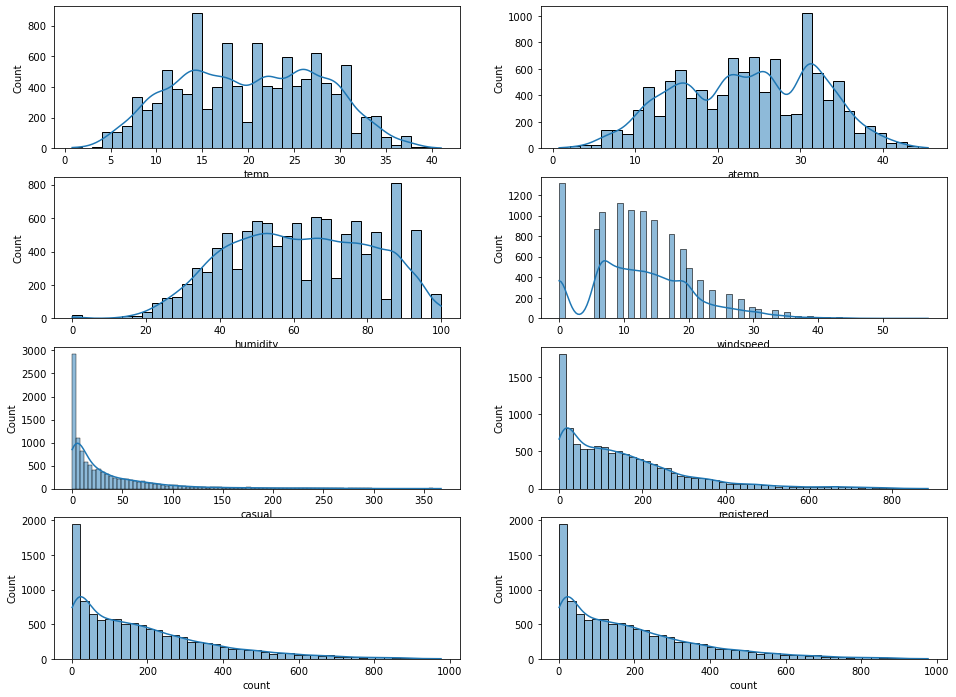

In [97]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 12))
index=1
for i in range(4):
    for j in range(2):
        sns.histplot(df[numeric_col[index]], ax=axis[i, j], kde=True)
        if index!=7:
            index+=1

# Log Normal Distribution --> casual, registered, windspeed and count 
# Normal Distribution --> temp, atemp and humidity

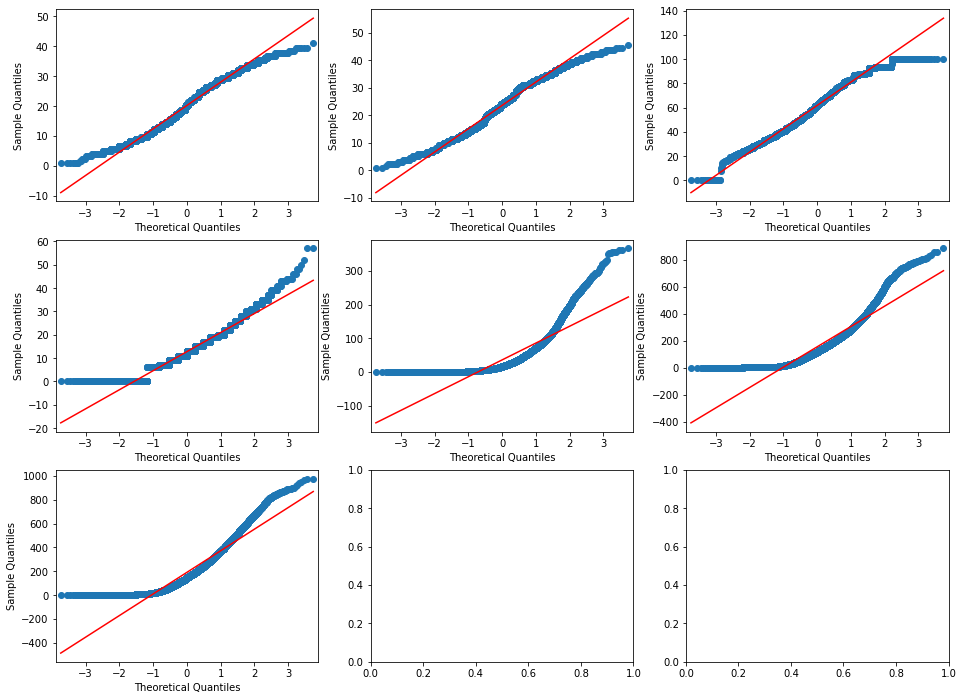

In [98]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
index=1
for i in range(3):
    for j in range(3):
        if index<=7:
            qqplot(df[numeric_col[index]], line="s", ax=axis[i, j])
            index+=1

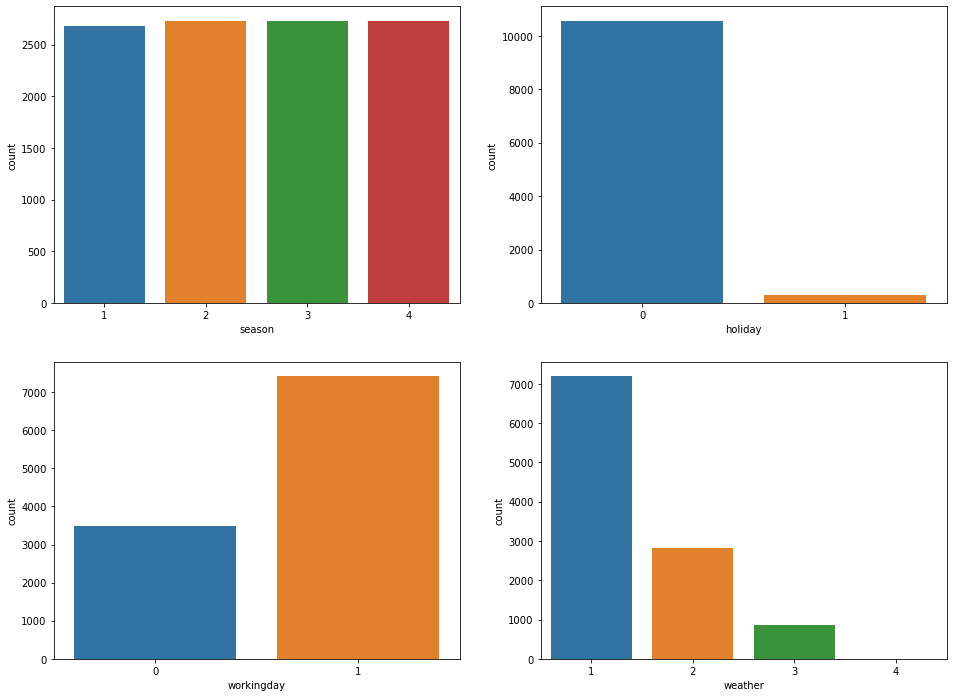

In [99]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(x=df[category_col[index]], ax=axis[row, col])
        index += 1


Here,
1. Almost all season have same count.
2. More count on Holiday as compared to working day.
3. In workingday graph, because a lot of people don't use vehicles on holiday we can see imbalance

- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


4. Weather 1 that is clear weather having the maximum demands for bike goes on decreasing as weather changes to mist and then light snow and almost negligible in the heavy rain. As it is much risky to use Bike in such a climate

<AxesSubplot:xlabel='season', ylabel='count'>

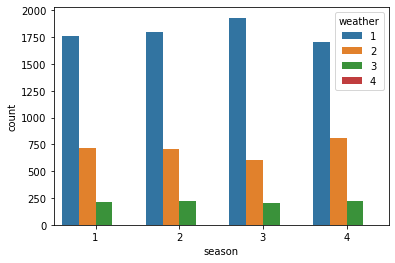

In [100]:
sns.countplot(x=df['season'], hue=df['weather'], data = df)
# As we can clearly see, its not the season but the weather that is effecting the demand for electric cycles

<AxesSubplot:xlabel='season', ylabel='count'>

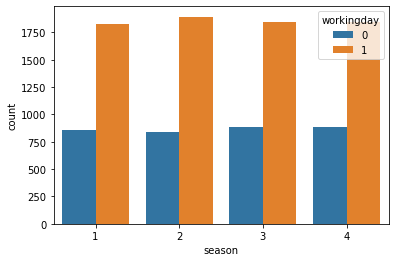

In [101]:
sns.countplot(x=df['season'], hue=df['workingday'])
#Clearly the working days have more demand as employees may be using it to travel to their offices

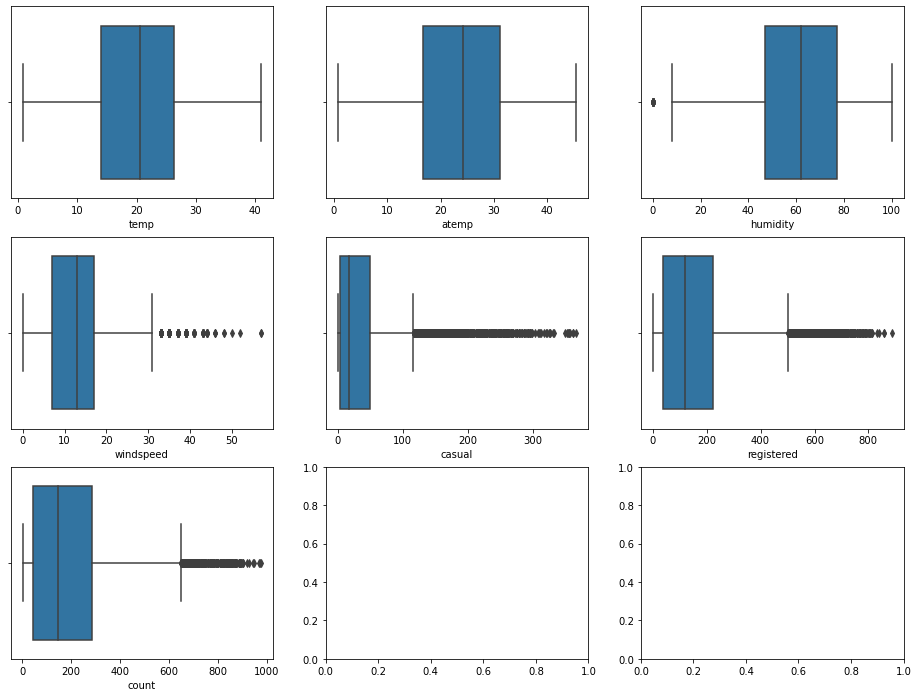

In [102]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
index=1
for i in range(3):
    for j in range(3):
        if index<=7:
            sns.boxplot(x=df[numeric_col[index]], ax=axis[i, j])
            index+=1

# Bivariate Analysis


In [107]:
bins=[0, 100, 300, 500, 700, 1000]
group=['Very Low','Low', 'Average', 'high' , 'Very high']
df['rent_count']= pd.cut(df['count'],bins,labels=group) # Creating new categorical column "Rent_count"

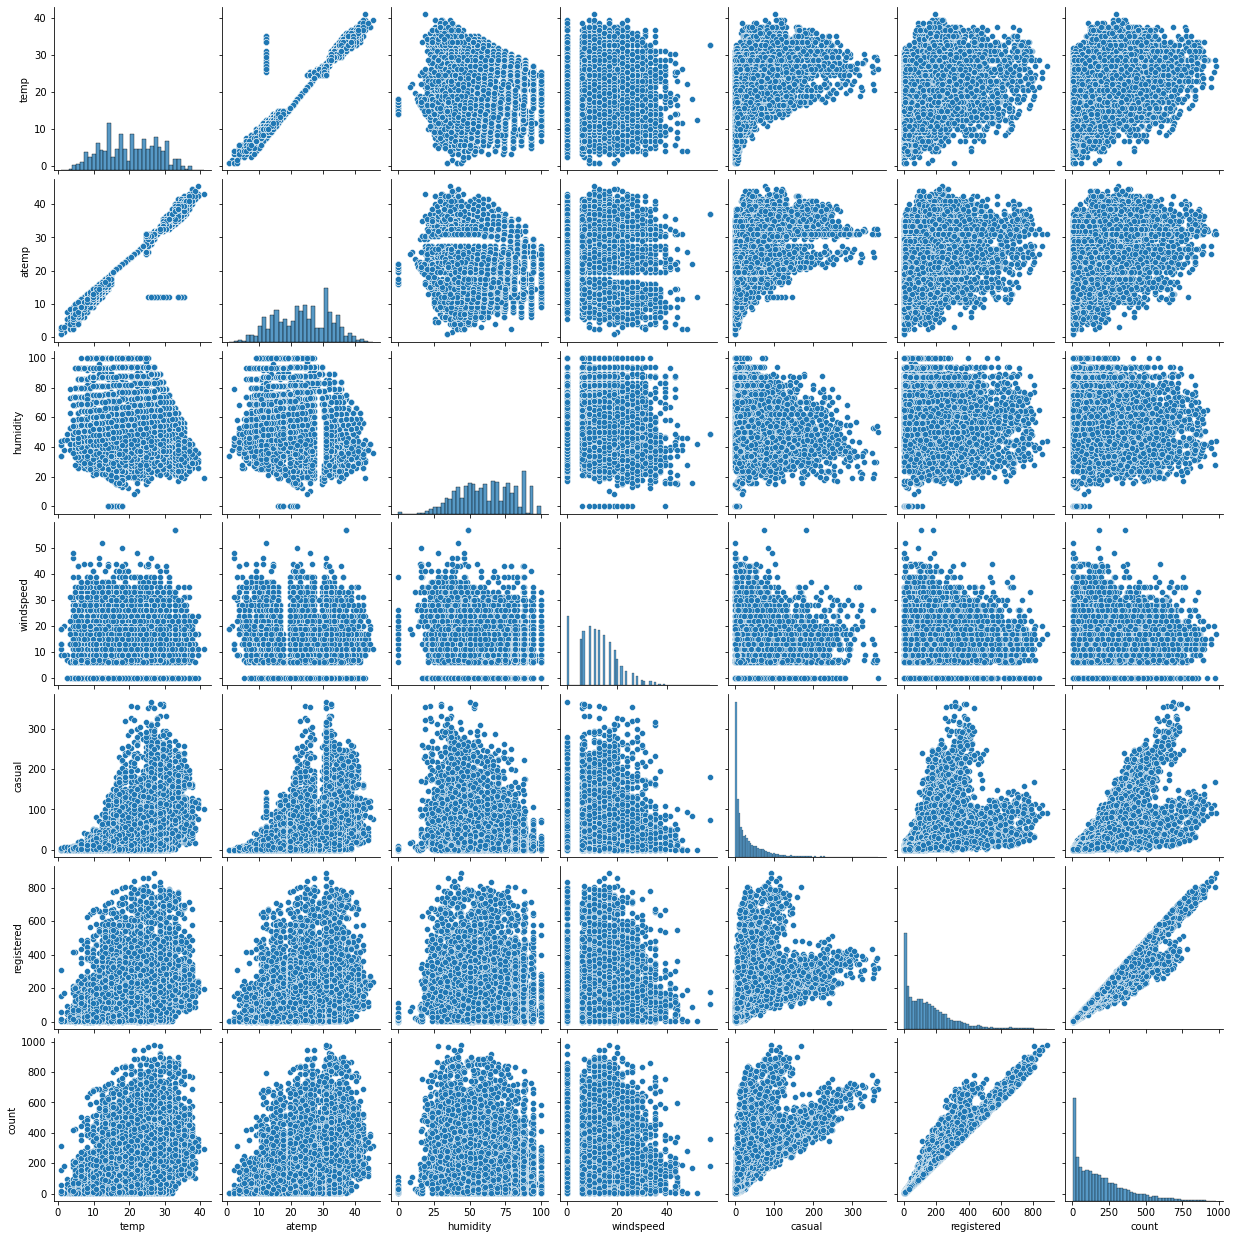

In [113]:
sns.pairplot(df)

<AxesSubplot:xlabel='season', ylabel='count'>

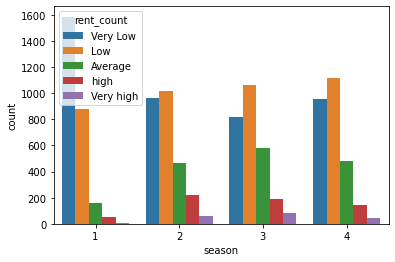

In [16]:
sns.countplot(x=df['season'], hue=df['rent_count'])

In [17]:
pd.crosstab(index=df['season'], columns=df['rent_count'], margins=True)


rent_count,Very Low,Low,Average,high,Very high,All
season,,,,,,
1,1586,882,159,51,8,2686
2,965,1018,469,222,59,2733
3,821,1062,579,187,84,2733
4,956,1114,478,141,45,2734
All,4328,4076,1685,601,196,10886


<AxesSubplot:xlabel='rent_count', ylabel='count'>

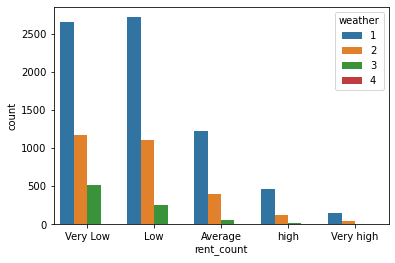

In [19]:
sns.countplot(x=df['rent_count'], hue=df['weather'])

([<matplotlib.patches.Wedge at 0x274eb527c10>,
 [Text(-0.6067654144600506, 0.9175160662435963, 'working day counts'),
  Text(0.6067653285559936, -0.9175161230530706, 'non-working day counts')])

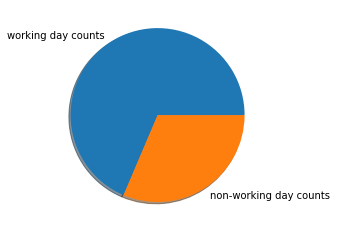

In [20]:
plt.pie([df.loc[df['workingday']==1]['count'].sum(), df.loc[df['workingday']==0]['count'].sum()],
 labels=['working day counts','non-working day counts'],
 shadow=True
 )

1. Clearly the working days have more demand as employees may be using it to travel to their offices that is workingday count is greater than the non-working day
3. In spring season less bikes are rented as compared to other seasons.
2. But we can also clearly see, its not the season but the weather that is effecting the demand for electric cycles
4. No matter the season whenever there is rain / thunderstorm / snow there were less bikes were rented

# 2 sample t-test

Perfoming 2 sample t test on working day and non working days

Taking significant alpha = 0.05

H0 = mean of count of bike on non working day = mean of counts of bike on non working day

Ha = mean of count of bike on non working day != equal to mean of counts of bike on working day



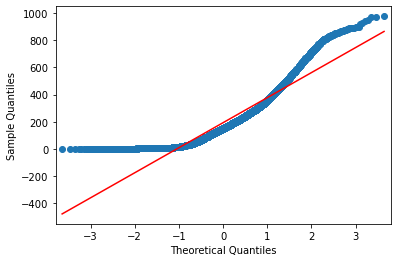

In [21]:
x=df.loc[df['workingday']==1]['count']
qqplot(x, dist=stats.norm, line='s');

In [22]:
df1=df.loc[df['workingday']==0]['count'].reset_index()
df1.drop(['index'], axis=1, inplace=True)
df1['count']=np.log(df1['count'])

df2=df.loc[df['workingday']==1]['count'].reset_index()
df2.drop(['index'], axis=1, inplace=True)
df2['count']=np.log(df2['count'])

<AxesSubplot:xlabel='count', ylabel='Count'>

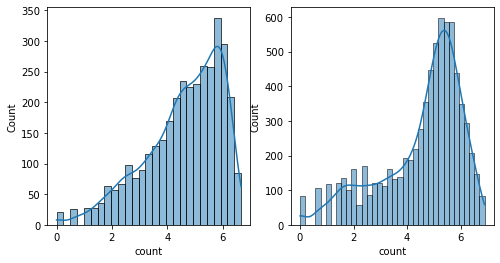

In [23]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.histplot(df1['count'], ax=axis[0], kde=True)
sns.histplot(df2['count'], ax=axis[1], kde=True)

In [26]:
tscore, pvalue = stats.ttest_ind(df1['count'],df2['count'])

In [28]:
if pvalue<0.05:
    print('Null Hypothesis Rejected')
else:
    print('We cannot reject the null hypothesis')

We cannot reject the null hypothesis


# Hypothesis Testing:

Sample t-test to check if Working Day has an effect on the number of electric cycles rented

H0 = There is no effect of Working Day on the number of electic cycles rented. 

Ha = There is an effect of WorkingDay on the number of electric cycles rented. 

Significance level 95%, alpha=0.05

In [29]:
df1=df.loc[df['workingday']==0]['count'].reset_index()
df1.drop(['index'], axis=1, inplace=True)
df2=df.loc[df['workingday']==1]['count'].reset_index()
df2.drop(['index'], axis=1, inplace=True)

mean1 = df1.mean()['count']
std1 = df1.std()['count']
nobs1 = df1.count()['count']

mean2 = df2.mean()['count']
std2 = df2.std()['count']
nobs2 = df2.count()['count']

In [30]:
print(mean1,std1,nobs1)
print(mean2,std2,nobs2)

188.50662061024755 173.72401532500032 3474
193.01187263896384 184.5136590421483 7412


In [31]:
# scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')
stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-1.2096277376026685, pvalue=0.22644804226361373)

In [32]:
pvalue=0.22644804226361373
if pvalue<0.05:
    print('Null Hypothesis Rejected')
else:
    print('We cannot reject the null hypothesis')

We cannot reject the null hypothesis


# ANOVA - Analysis of variance

In [33]:
df_weather1_clear = df[df["weather"] == 1]["count"]
df_weather2_Mist = df[df["weather"] == 2]["count"]
df_weather3_LightSnow = df[df["weather"] == 3]["count"]
df_weather4_HeavyRain = df[df["weather"] == 4]["count"]

In [35]:
#H0 = weather does not have any effect on number of cycles rented.
#Ha = At least one weather out of four (1: clear, 2: Mist, 3:Light snow, 4:Heavy Rain) has an effect on number of cycles rented
#We will consider alpha as 0.01 significance value. i.e 99% confidence

alpha = 0.01

f_stat, p_value = stats.f_oneway(df_weather1_clear,df_weather2_Mist,df_weather3_LightSnow,df_weather4_HeavyRain)
print(f"Test statistic = {f_stat} pvalue = {p_value}")

if (p_value < alpha):
 print("Reject Null Hypothesis")
else:
 print("Fail to reject Null Hypothesis")


Test statistic = 65.53024112793271 pvalue = 5.482069475935669e-42
Reject Null Hypothesis


Therefore we can say with 99% significance that weather does have an effect on number of cycles rented

# Chi-squared test

category_col: ['season', 'holiday', 'workingday', 'weather'] 

In [ ]:
season: season (1: spring, 2: summer, 3: fall, 4: winter)

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [80]:
val = pd.crosstab(index = df["weather"], columns = df["season"], margins=True)
print(val)

season      1     2     3     4    All
weather                               
1        1759  1801  1930  1702   7192
2         715   708   604   807   2834
3         211   224   199   225    859
4           1     0     0     0      1
All      2686  2733  2733  2734  10886


In [78]:
#H0 = There is no relation between season and weather
#Ha = There is significant relation between season and weather

#We will consider alpha as 0.01 significance value. i.e 99% confidence

alpha = 0.01
val = pd.crosstab(index = df["weather"], columns = df["season"])

chi_stat, p_value, dof, confusion_matrix = stats.chi2_contingency(val)
print(f"chi_stat = {chi_stat}, p_value = {p_value}, \ndof = {dof}\n\nExpected ->\n{confusion_matrix}\n")

if (p_value < alpha):
    print("Null Hypothesis Rejected")
else:
    print("Fail to reject Null Hypothesis")


chi_stat = 49.15865559689363, p_value = 1.5499250736864862e-07, 
dof = 9

Expected ->
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]

Null Hypothesis Rejected


In [127]:
# Chi-square goodness of fit test

# H0 : Weather does not effect yulu
# Ha : Change in weather does affect yulu

#We will consider alpha as 0.01 significance value. i.e 99% confidence

from scipy.stats import chisquare

obs = df.groupby('weather').sum()['count']

# print(obs,'-->',obs.sum())
# exp = [obs.sum()*0.25, obs.sum()*0.25, obs.sum()*0.25, obs.sum()*0.25]
# no need to pass exp as it is equally distributed

alpha = 0.01
result = chisquare(obs)
print(result)

if (p_value < alpha):
    print("Null Hypothesis Rejected")
else:
    print("Fail to reject Null Hypothesis")

Power_divergenceResult(statistic=2606777.3491366, pvalue=0.0)
Null Hypothesis Rejected


Hence we can very confidently say that, change in weather will effect Yulu

# Insights :-

1. By doing an ANOVA test on all weather situations except 4 with regard to count, we can deduce that population count means under all weather conditions are the same, indicating that different weather circumstances have varied usage patterns for Yulu bikes.
2. By performing a 2-sample T-test on working and non-working days with respect to count we found out there is no effect of Working Day on the number of electic cycles rented. 
3. An ANOVA test on different seasons and count suggests that population count means under various seasons are different, indicating that different seasons have varied usage patterns for Yulu bikes.
4. More counts in clear skies with less clouds, as evidenced by the Annova hypothesis test.
5. By performing a Chi2 test on season and weather (categorical variables), we can conclude that season has a weather-dependent effect.
6. By performing a Chi-square goodness of fit test, we can very confidently say that, change in weather will effect Yulu

# Recommendations :-

When there are no working days because the count is so low, Yulu can consider promotional activities like contests for city exploration and wellness initiatives.

Since there are hardly any casual users, Yulu should concentrate on its marketing strategy to attract new clients. for instance, first-time user discounts, discounts for friends and family, referral bonuses, etc.

Yulu can introduce a different vehicle, such as a car, or have shade or protection from the rain during heavy downpours because rent count is quite low.